In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet, Lars, SGDRegressor

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


In [2]:
data = pd.read_csv('automobile_processed.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,12.0,8,350.0,180,4499,12.5,48
1,37.2,4,86.0,65,2019,16.4,41
2,21.0,6,199.0,90,2648,15.0,51
3,36.0,4,105.0,74,1980,15.3,39
4,25.0,4,110.0,87,2672,17.5,51


In [3]:
result_dict = {}

In [4]:

def build_model(regression_fn, 
                name_of_y_col, 
                name_of_x_cols, 
                dataset, 
                test_frac=0.2,
                preprocess_fn = None, 
                show_plot_Y = True, 
                show_plot_scatter = False):
    
    X = dataset[name_of_x_cols]
    Y = dataset[name_of_y_col]
    
    if preprocess_fn is not None:
        X = preprocess_fn(X)
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = test_frac)
    
    model = regression_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    print("Training Score : ", model.score(x_train, y_train))
    print("Testing Score : ", r2_score(y_test, y_pred))
    
    if show_plot_Y == True:
        fig, ax = plt.subplots(figsize=(12,8))
        
        plt.plot(y_pred, label='Predicted')
        plt.plot(y_test.values, label='Actual')
        
        plt.ylabel(name_of_y_col)
        
        plt.legend()
        plt.show()
        
    if show_plot_scatter == True:
        
        fig, ax = plt.subplots(figsize=(12,8))
        
        plt.scatter(x_test, y_test)
        plt.plot(y_test, y_pred, 'r')
        
        
        
        plt.legend(['Predicted Line','Observed Line'])
        plt.show()
    
    return {
        'training_score' : model.score(x_train, y_train),
         'test_core' : r2_score(y_test, y_pred)
    }

In [5]:
def compare_results():
    for key in result_dict:
        print('Regression : ', key)

        print('Training Score', result_dict[key]['training_score'])

        print('Test Score', result_dict[key]['test_core'])
        print()
        

In [6]:
def linear_reg(x_train, y_train):
    model = LinearRegression(normalize=True)
    model.fit(x_train, y_train)
    
    return model

Training Score :  0.71803676736608
Testing Score :  0.5495702873033254


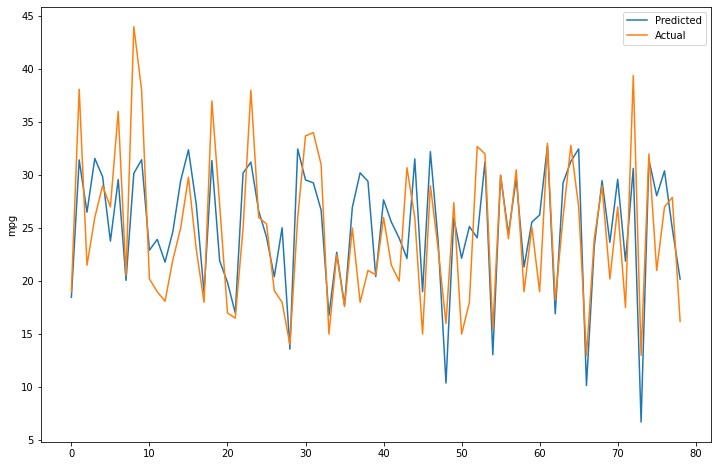

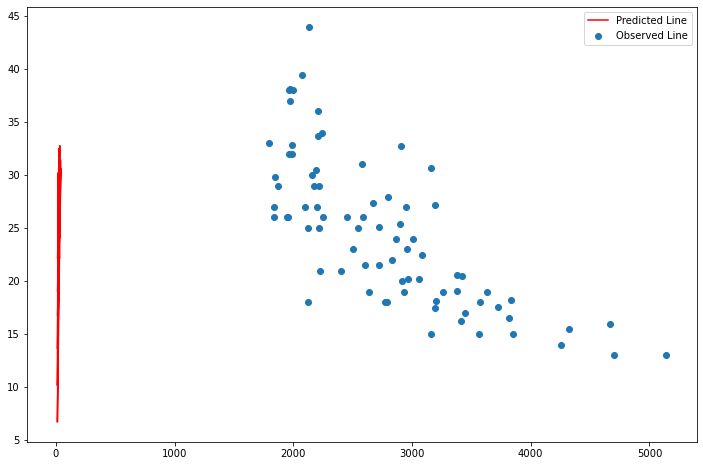

In [7]:
result_dict['mpg - single linear'] = build_model(linear_reg, 'mpg',['weight'], data, show_plot_Y=True,
                                               show_plot_scatter = True )

Training Score :  0.7185708442764198
Testing Score :  0.6605023973272994


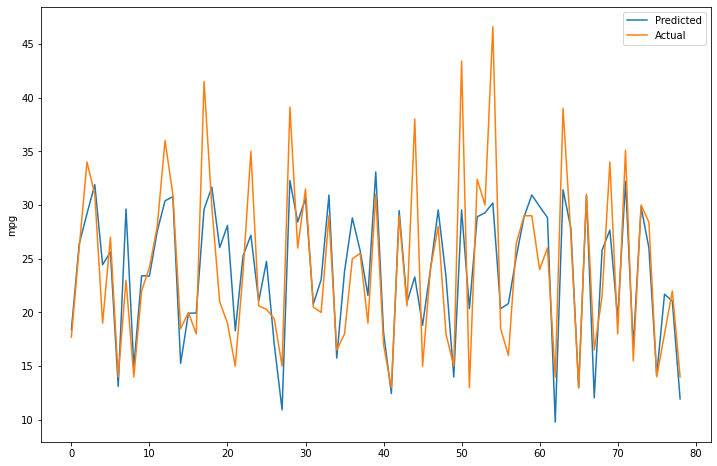

In [8]:
result_dict['mpg - kitchen_sink linear'] = build_model(linear_reg, 
                                                       'mpg',
                                                       ['cylinders',
                                                        'displacement',
                                                        'horsepower', 
                                                        'weight',
                                                        'acceleration'], 
                                                       data, show_plot_Y=True,
                                                       show_plot_scatter = False )

Training Score :  0.6940688010667911
Testing Score :  0.749204071490461


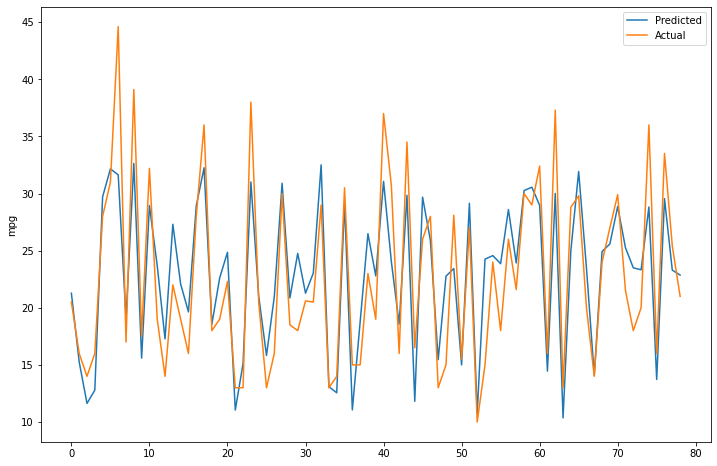

In [9]:
result_dict['mpg - parsimonius linear'] = build_model(linear_reg, 
                                                       'mpg',
                                                       ['horsepower', 
                                                        'weight',], 
                                                       data, show_plot_Y=True)
                                                       

In [10]:
compare_results()

Regression :  mpg - single linear
Training Score 0.71803676736608
Test Score 0.5495702873033254

Regression :  mpg - kitchen_sink linear
Training Score 0.7185708442764198
Test Score 0.6605023973272994

Regression :  mpg - parsimonius linear
Training Score 0.6940688010667911
Test Score 0.749204071490461



<h1>Lasso Regression

In [11]:
#Lasso regression model uses L1 penalty function 
#It reduces the magnitude of the regression coefficients by adding L1 regularization in  the loss function
#alpha is the constant used to multiply the L1 term, default value is 1
#If you set alpha = 0 it completely eliminate L1 norm then it will become ordinary linear regression so sklearn 
#implemented as such it's alpha shouldn't be with alpha = 0

def lasso_reg(x_train, y_train, alpha=0.5):
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_train)
    
    return model

Training Score :  0.7221208401147909
Testing Score :  0.6498437364551807


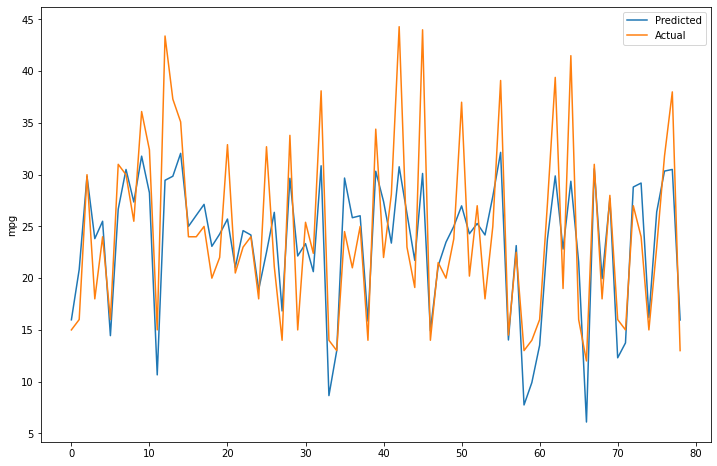

In [12]:
result_dict['mpg - kitchen_sink_lasso'] = build_model(lasso_reg, 
                                                       'mpg',
                                                       ['cylinders',
                                                        'displacement',
                                                        'horsepower', 
                                                        'weight',
                                                        'acceleration'],
                                                       data, 
                                                       show_plot_Y=True)
                                                       

In [13]:
compare_results()

Regression :  mpg - single linear
Training Score 0.71803676736608
Test Score 0.5495702873033254

Regression :  mpg - kitchen_sink linear
Training Score 0.7185708442764198
Test Score 0.6605023973272994

Regression :  mpg - parsimonius linear
Training Score 0.6940688010667911
Test Score 0.749204071490461

Regression :  mpg - kitchen_sink_lasso
Training Score 0.7221208401147909
Test Score 0.6498437364551807



<h1>Ridge Regression

In [14]:
#Ridge regression model uses L2 penalty function 
#It reduces the magnitude of the regression coefficients by adding L2 regularization in  the loss function
#Larger alpha implies stronger regularization

def ridge_reg(x_train, y_train, alpha=0.5, normalize=True):
    model = Ridge(alpha=alpha, normalize=True)
    model.fit(x_train, y_train)
    
    return model

Training Score :  0.6884030180403156
Testing Score :  0.6632306607610594


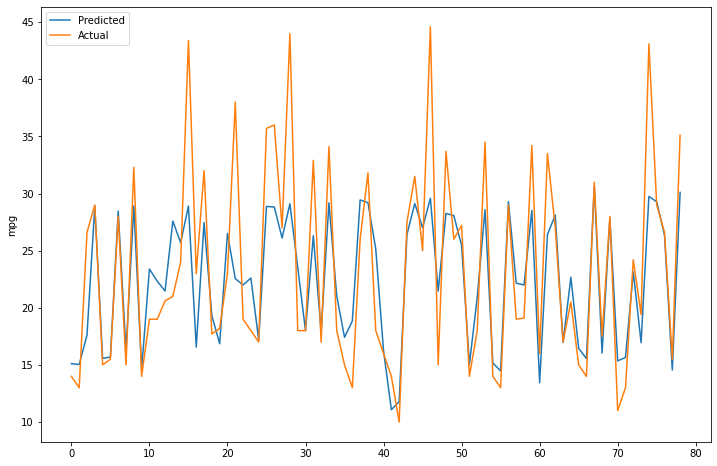

In [15]:
result_dict['mpg - kitchen_sink_ridge'] = build_model(ridge_reg, 
                                                       'mpg',
                                                       ['cylinders',
                                                        'displacement',
                                                        'horsepower', 
                                                        'weight',
                                                        'acceleration'],
                                                       data, 
                                                       show_plot_Y=True)
                                                       

In [16]:
compare_results()

Regression :  mpg - single linear
Training Score 0.71803676736608
Test Score 0.5495702873033254

Regression :  mpg - kitchen_sink linear
Training Score 0.7185708442764198
Test Score 0.6605023973272994

Regression :  mpg - parsimonius linear
Training Score 0.6940688010667911
Test Score 0.749204071490461

Regression :  mpg - kitchen_sink_lasso
Training Score 0.7221208401147909
Test Score 0.6498437364551807

Regression :  mpg - kitchen_sink_ridge
Training Score 0.6884030180403156
Test Score 0.6632306607610594



<h1>Elastic Net Regression

In [17]:
#Reduces the magnitude of regression coefficients by applying L1 and L2 regularization
#alpha = 1 is the constant used to multiply penalty terms 
#l1_ratio = 0 - L2 penalty(uses L2 norm ridge), 1 for L1 penalty(lasso L1 norms)
#max_iter=100000 will gives you better results
#warm_start = True - reuse the solution of the previous call to fit as initilization:
#oterwise just erase the previous solution warm_start=False
#equivalent_to - what the elasitc net model is equivalent to 

def elastic_net_reg(x_train, y_train, alpha=1, l1_ratio=0.5, normalize=False, max_iter=100000,
                   warm_start=True, equivalent_to='Elastic Net'):
    
    print('equivalent_to : ', equivalent_to)
    
    model = ElasticNet(alpha=alpha,l1_ratio=l1_ratio, normalize=normalize,
                      max_iter=max_iter, warm_start = warm_start )
    model.fit(x_train, y_train)
    
    return model

equivalent_to :  OLS


<ipython-input-17-3494b2c09642>:16: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(x_train, y_train)
/home/catalina/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/catalina/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2955.825019331736, tolerance: 1.8894451565495214
  model = cd_fast.enet_coordinate_descent(


Training Score :  0.687122432838472
Testing Score :  0.7821013267077325


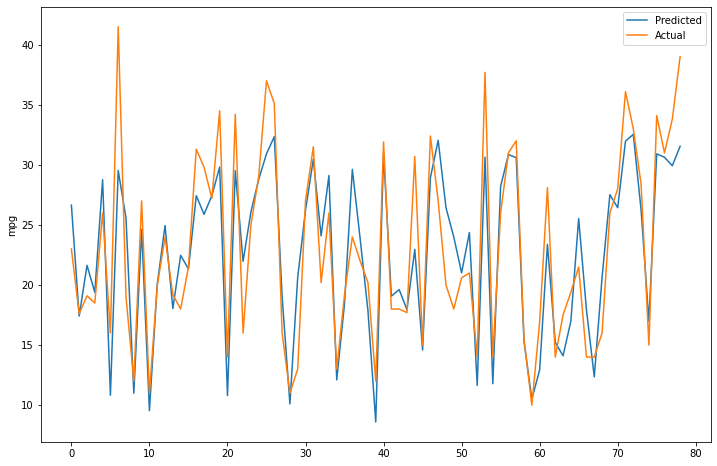

In [18]:
from functools import partial  

#alpha = 0 simple linear ordinary  least squares regression

result_dict['mpg - kitchen_sink_elastic-net-ols'] = build_model(partial(elastic_net_reg, alpha=0,
                                                                       equivalent_to='OLS'), 
                                                       'mpg',
                                                       ['cylinders',
                                                        'displacement',
                                                        'horsepower', 
                                                        'weight',
                                                        'acceleration'],
                                                       data, 
                                                       show_plot_Y=True)

equivalent_to :  Lasso
Training Score :  0.7026571825975544
Testing Score :  0.7093050974529288


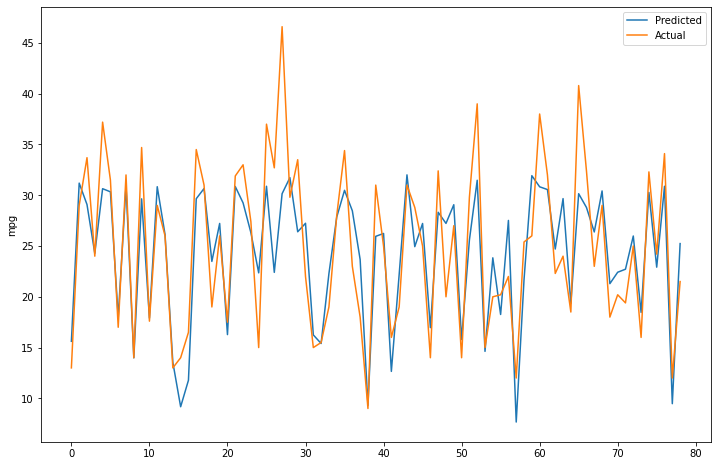

In [19]:

result_dict['mpg - kitchen_sink_elastic-net-ols'] = build_model(partial(elastic_net_reg, alpha=1,
                                                                        l1_ratio =1,
                                                                       equivalent_to='Lasso'), 
                                                       'mpg',
                                                       ['cylinders',
                                                        'displacement',
                                                        'horsepower', 
                                                        'weight',
                                                        'acceleration'],
                                                       data, 
                                                       show_plot_Y=True)

equivalent_to :  Ridge


/home/catalina/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2935.4185294441027, tolerance: 1.974258479233227
  model = cd_fast.enet_coordinate_descent(


Training Score :  0.7027398093074468
Testing Score :  0.7245000765163487


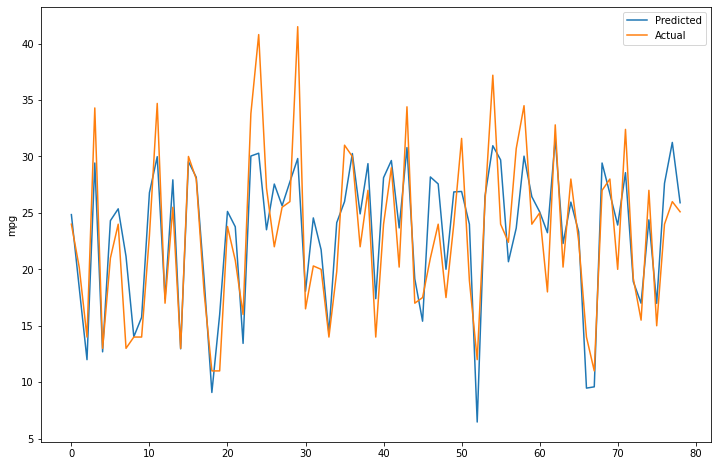

In [20]:

result_dict['mpg - kitchen_sink_elastic-net-ols'] = build_model(partial(elastic_net_reg, alpha=1,
                                                                        l1_ratio =0,
                                                                       equivalent_to='Ridge'), 
                                                       'mpg',
                                                       ['cylinders',
                                                        'displacement',
                                                        'horsepower', 
                                                        'weight',
                                                        'acceleration'],
                                                       data, 
                                                       show_plot_Y=True)

equivalent_to :  Elastic Net
Training Score :  0.7220881275373778
Testing Score :  0.6435399206534878


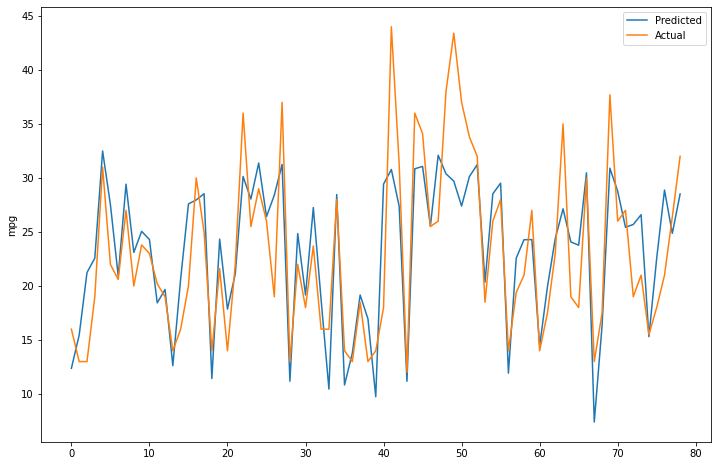

In [21]:

result_dict['mpg - kitchen_sink_elastic-net-ols'] = build_model(partial(elastic_net_reg, alpha=1,
                                                                        l1_ratio =0.5), 
                                                       'mpg',
                                                       ['cylinders',
                                                        'displacement',
                                                        'horsepower', 
                                                        'weight',
                                                        'acceleration'],
                                                       data, 
                                                       show_plot_Y=True)

<h2>Support Vector Regression

In [23]:
#linearSVR == SVR(kernal='linear')
#A kernel is a shortcut function that the algorithm uses  to transform higher dim.data into dim. easier work with
#LinearSVR offer more penalties and loss function and scales better to larger dataset

#SVR tries to fit as many poits as possible into a margin surrounding the best fit line 
#Margin or epsilon tube = 2e-- the margin the SVR tries to fit as many points possible  is given by e multiply by
#this epislon
#C is the penalty that we apply to points lies outside the epsilon line while calculating errors
#points  lies outside margin violation this penalty seeks to reduce the number of margin violations
#High value imposes heavy penalty on outliers


def svr_reg(x_train, y_train, kernel='linear', epsilon = 0.05, C = 0.3):
    model = SVR(kernel=kernel, epsilon = epsilon, C = C)
    model.fit(x_train, y_train)
    
    return model

Training Score :  0.7022277700859483
Testing Score :  0.7063171931009413


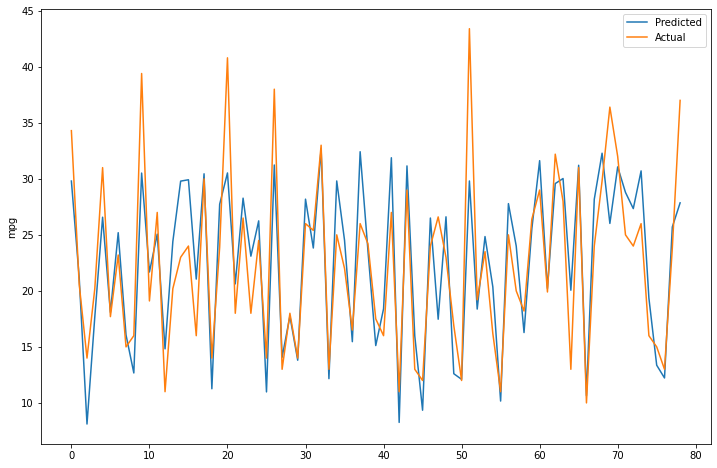

In [24]:

result_dict['mpg - kitchen_sink_svr'] = build_model(svr_reg, 
                                                       'mpg',
                                                       ['cylinders',
                                                        'displacement',
                                                        'horsepower', 
                                                        'weight',
                                                        'acceleration'],
                                                       data, 
                                                       show_plot_Y=True)

In [25]:
compare_results()

Regression :  mpg - single linear
Training Score 0.71803676736608
Test Score 0.5495702873033254

Regression :  mpg - kitchen_sink linear
Training Score 0.7185708442764198
Test Score 0.6605023973272994

Regression :  mpg - parsimonius linear
Training Score 0.6940688010667911
Test Score 0.749204071490461

Regression :  mpg - kitchen_sink_lasso
Training Score 0.7221208401147909
Test Score 0.6498437364551807

Regression :  mpg - kitchen_sink_ridge
Training Score 0.6884030180403156
Test Score 0.6632306607610594

Regression :  mpg - kitchen_sink_elastic-net-ols
Training Score 0.7220881275373778
Test Score 0.6435399206534878

Regression :  mpg - kitchen_sink_svr
Training Score 0.7022277700859483
Test Score 0.7063171931009413



<h1>Nearest Neighbors Regression

Nearest Neighbors Regression uses training data to find what is most similar to the current sample. 

In [31]:
#Default  is 5 neighbors

def neighbors_reg(x_train, y_train, n_neighbors = 10):
    
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(x_train, y_train)
    
    return model

For a test instances, the KNN regressor finds the K nearest neighbors and combines their value to make a prediction. May use brute force or other algorithms to compute the nearest neighbors - by default chooses the best algorithm based on the data.

Training Score :  0.7585196861441663
Testing Score :  0.7410452581809416


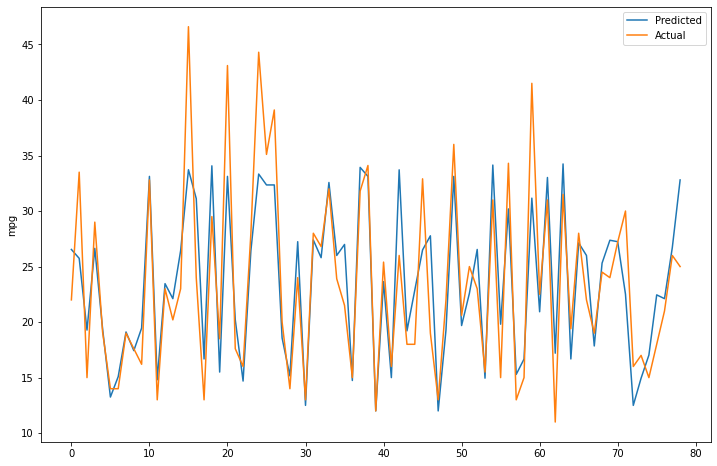

In [32]:

result_dict['mpg - kitchen_sink_kneighbors'] = build_model(neighbors_reg, 
                                                       'mpg',
                                                       ['cylinders',
                                                        'displacement',
                                                        'horsepower', 
                                                        'weight',
                                                        'acceleration'],
                                                       data, 
                                                       show_plot_Y=True)

In [33]:
compare_results()

Regression :  mpg - single linear
Training Score 0.71803676736608
Test Score 0.5495702873033254

Regression :  mpg - kitchen_sink linear
Training Score 0.7185708442764198
Test Score 0.6605023973272994

Regression :  mpg - parsimonius linear
Training Score 0.6940688010667911
Test Score 0.749204071490461

Regression :  mpg - kitchen_sink_lasso
Training Score 0.7221208401147909
Test Score 0.6498437364551807

Regression :  mpg - kitchen_sink_ridge
Training Score 0.6884030180403156
Test Score 0.6632306607610594

Regression :  mpg - kitchen_sink_elastic-net-ols
Training Score 0.7220881275373778
Test Score 0.6435399206534878

Regression :  mpg - kitchen_sink_svr
Training Score 0.7022277700859483
Test Score 0.7063171931009413

Regression :  mpg - kitchen_sink_kneighbors
Training Score 0.7585196861441663
Test Score 0.7410452581809416



<h1>Stochastic Gradient Descent Regression - SGD

In order to perform SGD regressor we have to scale and standardizes a dataset to have mean=0 and variance =1

In [41]:
def apply_standard_scaler(x):
    scaler = StandardScaler()
    scaler.fit(x)
    
    return scaler.transform(x)

In [39]:
#SGD - Perform numerica optimization - one training instance at a time - to find best model parameters
#max_iter or epochs for each epoch it will consider one instance of your  training data
#tol- tolerance- stoping criterion for our model- the training iteration of your model will stop when the loss 
#at each consecutive iteration falls to below the tolerance when the loss reduces less than the tolerance that
#your model isn't improving that much so stop training right there

def sgd_reg(x_train, y_train, max_iter = 10000, tol = 1e-3):
    
    model = SGDRegressor(max_iter = max_iter, tol = tol)
    model.fit(x_train, y_train)
    
    return model

Training Score :  0.7175877876407113
Testing Score :  0.65794009390908


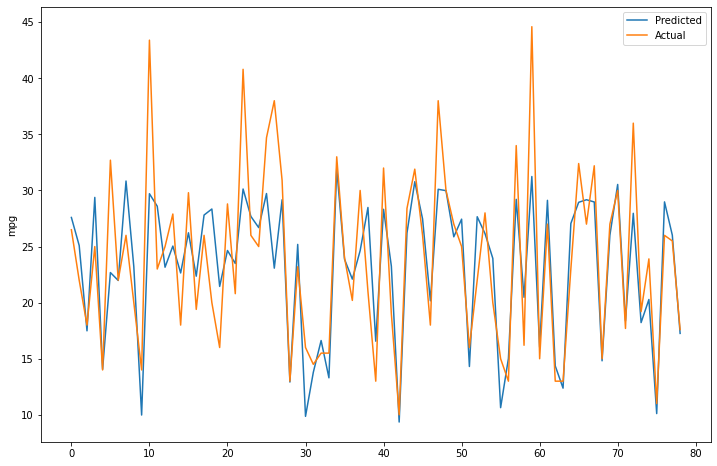

In [42]:

result_dict['mpg - kitchen_sink_sgd'] = build_model(sgd_reg, 
                                                       'mpg',
                                                       ['cylinders',
                                                        'displacement',
                                                        'horsepower', 
                                                        'weight',
                                                        'acceleration'],
                                                       data, 
                                                       show_plot_Y=True,
                                                    preprocess_fn = apply_standard_scaler)

<h1>Decision Trees for Regression

Fit a decision tree to training data using CART-Classification And Regression Tree algorithm<br>

A Decision tree splits your underlying data into subsets where every subset contains points that it consider similar. The data is repeatedly  split into  subsets to form a tree structure and the shape of the tree depends on  the constraints that you specify.<br>

Given a test instance, traverse the decision tree and return avg. value  of all training instences in the corresponding leaf node.

In [43]:
def decision_tree_reg(x_train, y_train, max_depth=2):
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(x_train, y_train)
    
    return model

Training Score :  0.7377266683638546
Testing Score :  0.6832018039759757


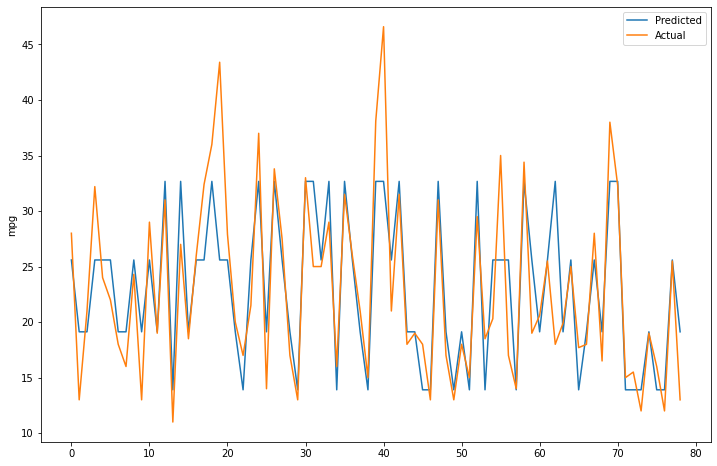

In [44]:

result_dict['mpg - kitchen_sink_decision_tree'] = build_model(decision_tree_reg, 
                                                       'mpg',
                                                       ['cylinders',
                                                        'displacement',
                                                        'horsepower', 
                                                        'weight',
                                                        'acceleration'],
                                                       data, 
                                                       show_plot_Y=True)

<h1>LARS - Least Angle Regression

In [46]:
#It calculates how correlated each of your feature are with the target
#Features are included in the reg. model in the order of their corr. with the target with the highest correlated
#features added first

def lars_reg(x_train, y_train, n_nonzero_coefs = 4):
    model = Lars(n_nonzero_coefs = n_nonzero_coefs)
    model.fit(x_train, y_train)
    
    return model

Training Score :  0.7101510565073559
Testing Score :  0.6938148638661437


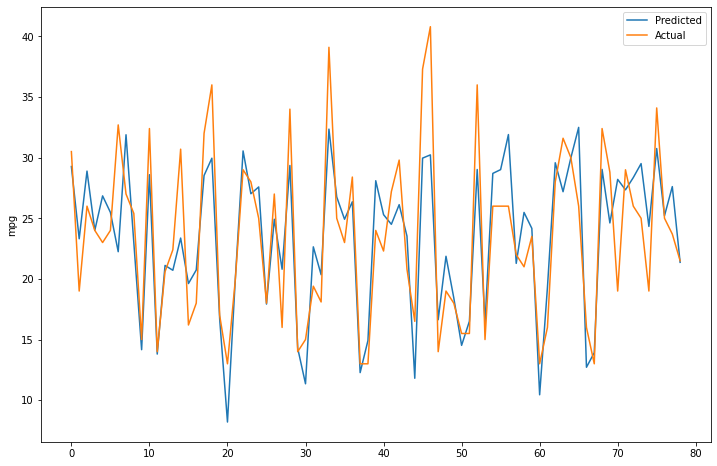

In [47]:

result_dict['mpg - kitchen_sink_decision_tree'] = build_model(lars_reg, 
                                                       'mpg',
                                                       ['cylinders',
                                                        'displacement',
                                                        'horsepower', 
                                                        'weight',
                                                        'acceleration'],
                                                       data, 
                                                       show_plot_Y=True)

<h1>Regression with Polynomial Relationship 

y = Wx + b <br>

f(x) = Wx + b <br>
Relationship between y and x is a polynomial of a degree 1  <br>

y = Vx^2 + Wx + b <br>

f(x) = Vx^2 + Wx + b <br>
Relationship between y and x is a polynomial of a degree 2  <br>